**Author: Vishal khatik**

**Domain: Data Anylytics**

**Organization: Cognorise Infotec**

**Date: 1/09/24 to 1/09/24**

**Big_Mart_Sales**

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Corrected the typo in module name
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Train.csv', delimiter=',')
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [ ]:
df.shape

(8523, 12)

In [ ]:
df.size

102276

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
da = ProfileReport(df, title="Sales Profiling Report", explorative=True,sensitive=True)
da

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
  df.shape

(4650, 12)

In [ ]:
df.size

55800

In [ ]:
df.head(1)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1           3735.138

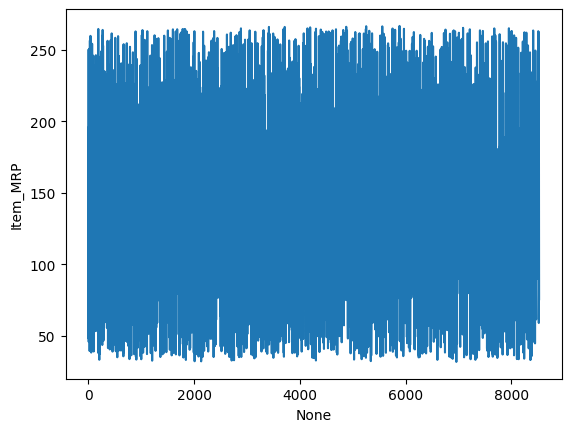

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=df.index, y=df['Item_MRP'])
plt.show()

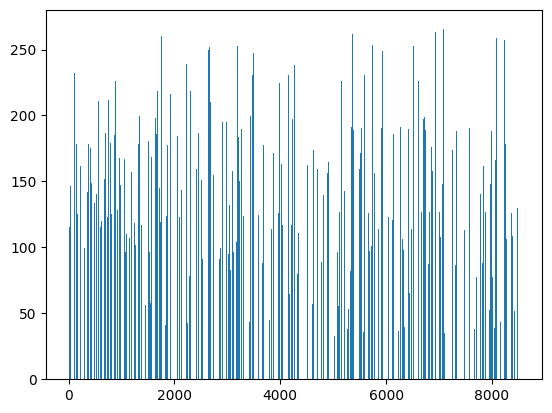

In [ ]:
plt.bar(df.index, df['Item_MRP'])
plt.show()

In [ ]:
df.head(1)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1           3735.138

In [ ]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    2774
Regular    1575
LF          177
reg          71
low fat      53
Name: count, dtype: int64

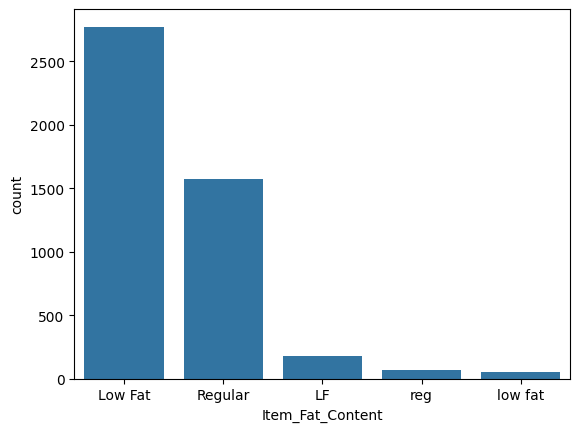

In [ ]:
sns.barplot(x=df['Item_Fat_Content'].value_counts().index, y=df['Item_Fat_Content'].value_counts())
plt.show()

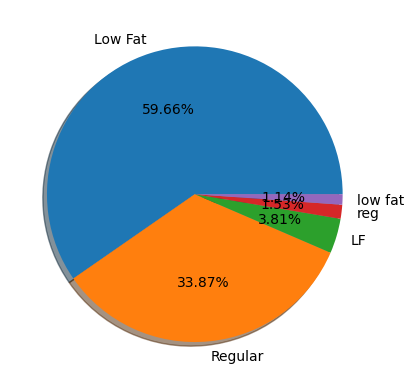

In [ ]:
plt.pie(x=df['Item_Fat_Content'].value_counts(),labels = df['Item_Fat_Content'].value_counts().index,autopct = '%.2f%%',shadow=True)
plt.show()

In [ ]:
df.head(1)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1           3735.138

In [ ]:
plt.figure(figsize = (5,2))
# Convert 'Item_Fat_Content' to a numerical representation if it contains strings
# For example, if it's categorical, you can use LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Item_Fat_Content_Encoded'] = le.fit_transform(df['Item_Fat_Content'])

fig = px.scatter(df, x="Item_MRP", y="Item_Weight", color="Item_Fat_Content",
                 size='Item_Fat_Content_Encoded', hover_data=['Item_Type']) # Use the encoded column for size
fig.show()

<Figure size 500x200 with 0 Axes>

In [ ]:
df.head(1)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1           3735.138   

   Item_Fat_Content_Encoded  
0                         1

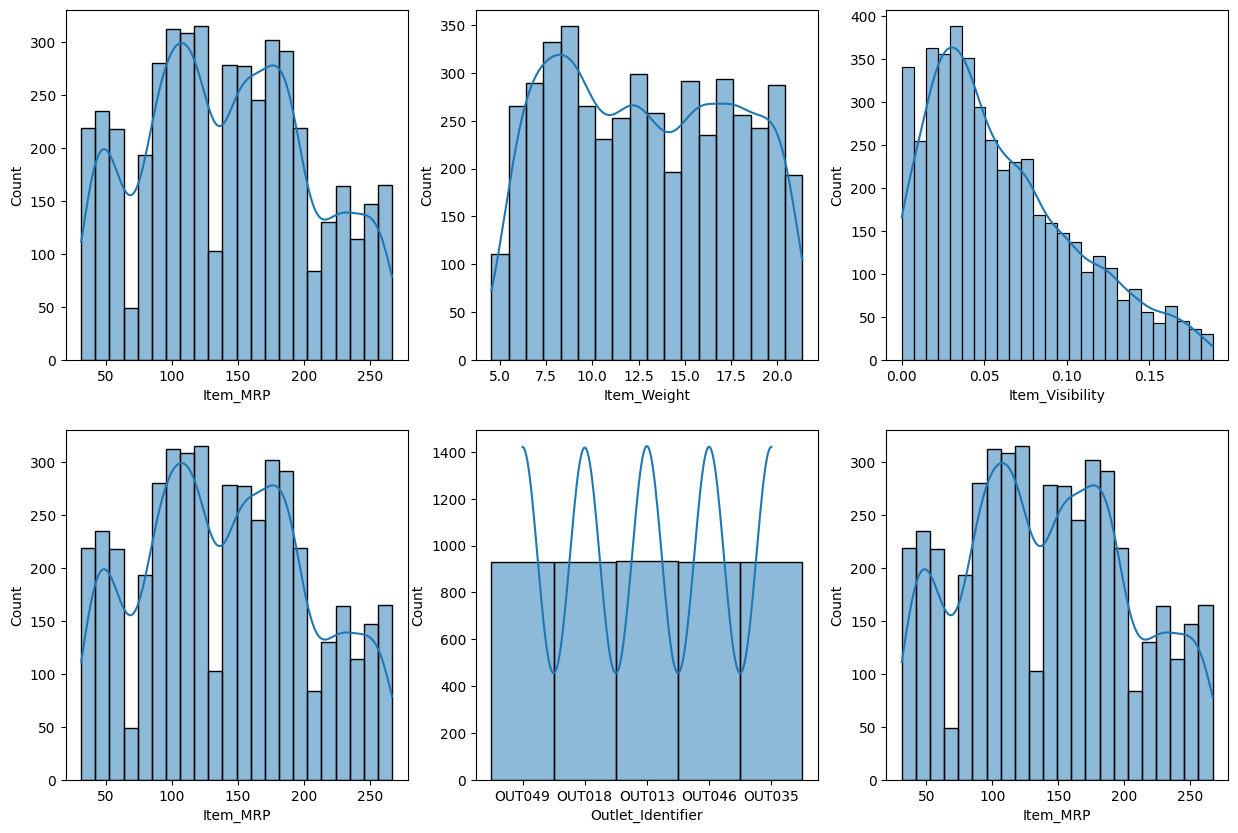

In [ ]:
plt.figure(figsize = (15,10))

plt.subplot(2,3,1)
sns.histplot(df['Item_MRP'],kde=True)

plt.subplot(2,3,2)
sns.histplot(df['Item_Weight'],kde=True)


plt.subplot(2,3,3)
sns.histplot(df['Item_Visibility'],kde=True)

plt.subplot(2,3,4)
sns.histplot(df['Item_MRP'],kde=True)


plt.subplot(2,3,5)
sns.histplot(df['Outlet_Identifier'],kde=True)

plt.subplot(2,3,6)
sns.histplot(df['Item_MRP'],kde=True)
plt.show()



In [ ]:
df.head(1)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1           3735.138   

   Item_Fat_Content_Encoded  
0                         1

In [ ]:
import plotly.express as px
plt.figure(figsize = (10,4))
fig = px.scatter(df, x="Outlet_Establishment_Year", y="Item_Weight", color='Item_Outlet_Sales',
                 size='Item_Outlet_Sales', hover_data=['Item_Fat_Content_Encoded'])
fig.show()

<Figure size 1000x400 with 0 Axes>

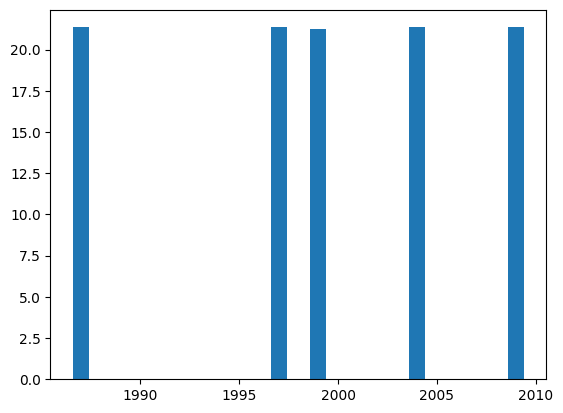

In [ ]:
plt.bar(df['Outlet_Establishment_Year'],df['Item_Weight'])
plt.show()

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_MRP'>

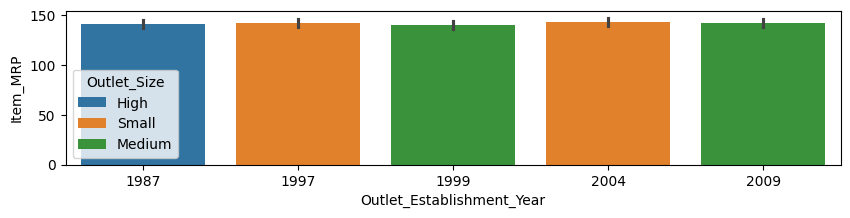

In [ ]:
plt.figure(figsize = (10,2))
sns.barplot(x='Outlet_Establishment_Year', y='Item_MRP', hue='Outlet_Size', data=df)

In [ ]:
df.head(1)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1           3735.138   

   Item_Fat_Content_Encoded  
0                         1

In [ ]:
fig = px.bar(df, x = 'Region', y = ' Estimated Unemployment Rate (%)', color = 'Region',
             title = 'Unemployment Rate in India',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
fig = px.bar(df,x =  'Outlet_Location_Type',y = 'Item_Outlet_Sales',
             color = 'Item_Type',
             title = 'Sales info',template='plotly')
fig.show()

In [ ]:
fig = px.bar(df,x =  'Outlet_Establishment_Year',y = 'Item_Outlet_Sales',
             color = 'Item_Type',
             title = 'Sales info',template='plotly')
fig.show()

In [ ]:
fig = px.box(df,x = 'Outlet_Establishment_Year',y = 'Item_Outlet_Sales',color = 'Item_Type',
             title = 'Unemployment Rate in India',template = 'plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
fig = px.box(df,x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',color = 'Item_Type',
             title = 'Unemployment Rate in India',template = 'plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
fig = px.scatter(df,x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',color = 'Item_Type',
             title = 'Unemployment Rate in India',template = 'plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
fig = px.histogram(df,x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',color = 'Item_Fat_Content',
             title = 'Unemployment Rate in India',template = 'plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

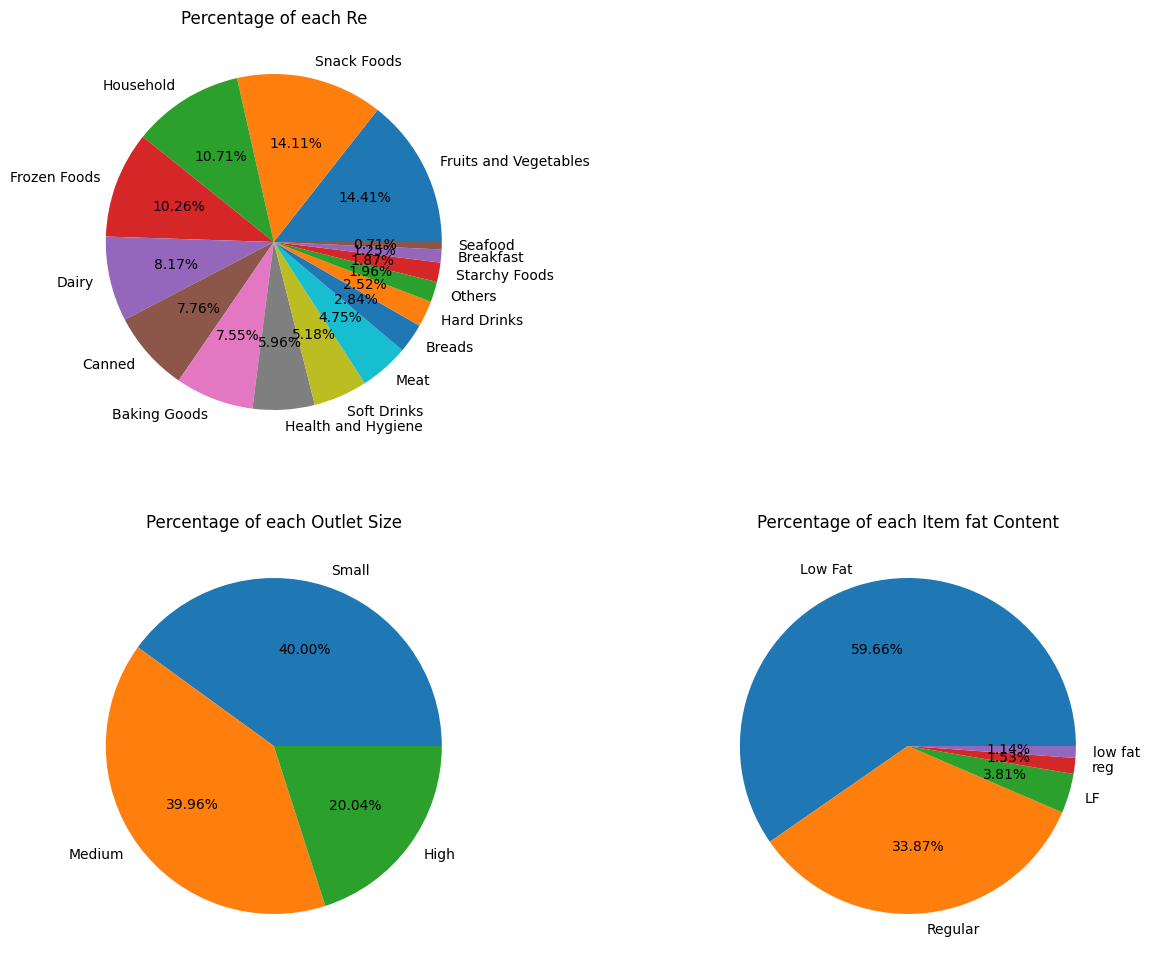

In [ ]:
plt.figure(figsize = (15,12))

plt.subplot(2,2,1)
df['Item_Type'].value_counts().plot(kind = 'pie',autopct = '%0.2f%%')
plt.title('Percentage of each Item Type')
plt.ylabel('',fontsize = 12,c = 'r')


plt.subplot(2,2,3)
df['Outlet_Size'].value_counts().plot(kind = 'pie',autopct = '%0.2f%%')
plt.title('Percentage of each Outlet Size')
plt.ylabel('',fontsize = 12,c = 'r')

plt.subplot(2,2,4)
df['Item_Fat_Content'].value_counts().plot(kind = 'pie',autopct = '%0.2f%%')
plt.title('Percentage of each Item fat Content')
plt.ylabel('',fontsize = 12,c = 'r')

plt.show()


In [ ]:
df.head(1)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1           3735.138   

   Item_Fat_Content_Encoded  
0                         1

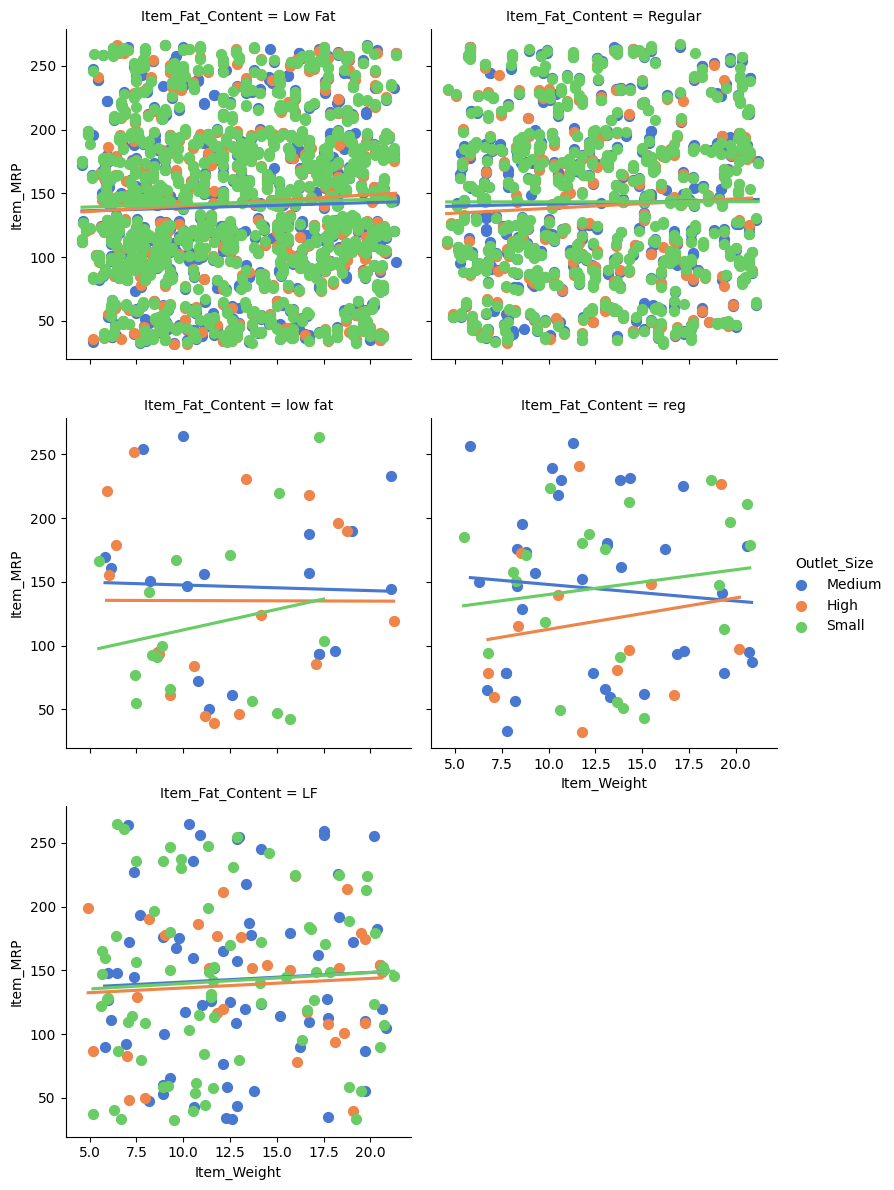

In [ ]:
sns.lmplot(
    data=df, x="Item_Weight", y="Item_MRP", col="Item_Fat_Content", hue="Outlet_Size",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

In [ ]:
df.head(1)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1           3735.138   

   Item_Fat_Content_Encoded  
0                         1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Item_Fat_Content_Encoded'] = le.fit_transform(df['Item_Fat_Content'])

In [ ]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    2774
Regular    1575
LF          177
reg          71
low fat      53
Name: count, dtype: int64

In [ ]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    670
Snack Foods              656
Household                498
Frozen Foods             477
Dairy                    380
Canned                   361
Baking Goods             351
Health and Hygiene       277
Soft Drinks              241
Meat                     221
Breads                   132
Hard Drinks              117
Others                    91
Starchy Foods             87
Breakfast                 58
Seafood                   33
Name: count, dtype: int64

In [ ]:
df.head(2)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1          3735.1380   
1               Tier 3  Supermarket Type2           443.4228   

   Item_Fat_Content_Encoded  
0                         1  
1                         2

In [ ]:
t = df.iloc[:,[5,12]]
t

Item_MRP  Item_Fat_Content_Encoded
0     249.8092                         1
1      48.2692                         2
2     141.6180                         1
4      53.8614                         1
5      51.4008                         2
...        ...                       ...
8517  178.8318                         4
8518  214.5218                         1
8520   85.1224                         1
8521  103.1332                         2
8522   75.4670                         1

[4650 rows x 2 columns]

In [ ]:
X = t.iloc[:,0].values.reshape(-1,1)

In [ ]:
X

array([[249.8092],
       [ 48.2692],
       [141.618 ],
       ...,
       [ 85.1224],
       [103.1332],
       [ 75.467 ]])

In [ ]:
y = t.iloc[:,1].values.reshape(-1,1)
y

array([[1],
       [2],
       [1],
       ...,
       [1],
       [2],
       [1]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 0)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
print('r2_score:',r2_score(y_test,y_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_pred))
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score: -0.0011992489508274584
mean_squared_error: 0.43496763804677907
mean_absolute_error: 0.5495181092100879


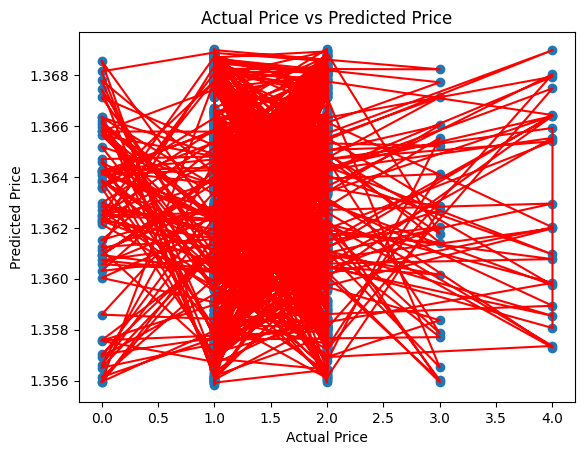

In [ ]:
plt.scatter(y_test,y_pred)

plt.plot(y_test,y_pred,'r')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [ ]:
df.head(1)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1           3735.138   

   Item_Fat_Content_Encoded  
0                         1

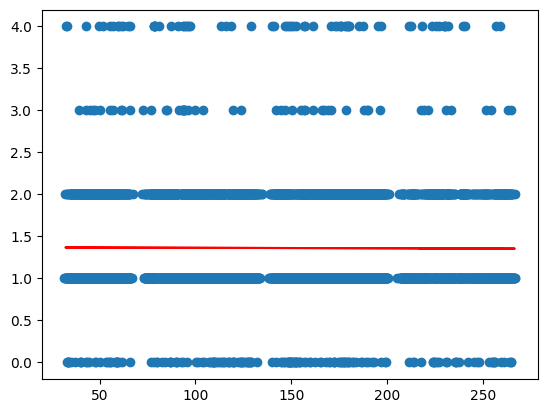

In [ ]:
plt.scatter(t['Item_MRP'],t['Item_Fat_Content_Encoded'])
plt.plot(X_test,lr.predict(X_test),color = 'red')
plt.show()

In [ ]:
t.head(1)

Item_MRP  Item_Fat_Content_Encoded
0  249.8092                         1

In [ ]:
df.head(1)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1           3735.138   

   Item_Fat_Content_Encoded  
0                         1

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
dc = DecisionTreeClassifier()

In [ ]:
features = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

X = df[features]
y = df['Item_Fat_Content_Encoded']

print(X)
print(y)

      Item_Weight  Item_Visibility  Item_MRP
0           9.300         0.016047  249.8092
1           5.920         0.019278   48.2692
2          17.500         0.016760  141.6180
4           8.930         0.000000   53.8614
5          10.395         0.000000   51.4008
...           ...              ...       ...
8517       20.750         0.083607  178.8318
8518        6.865         0.056783  214.5218
8520       10.600         0.035186   85.1224
8521        7.210         0.145221  103.1332
8522       14.800         0.044878   75.4670

[4650 rows x 3 columns]
0       1
1       2
2       1
4       1
5       2
       ..
8517    4
8518    1
8520    1
8521    2
8522    1
Name: Item_Fat_Content_Encoded, Length: 4650, dtype: int64


In [ ]:
from sklearn import tree

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.030,random_state = 0)

[Text(0.23850807329336185, 0.9852941176470589, 'Item_Weight <= 5.943\ngini = 0.528\nsamples = 4510\nvalue = [174, 2692, 1524, 51, 69]'),
 Text(0.03642911091929219, 0.9558823529411765, 'Item_MRP <= 260.161\ngini = 0.552\nsamples = 228\nvalue = [8, 101, 114, 3, 2]'),
 Text(0.035278197381671705, 0.9264705882352942, 'Item_Weight <= 5.473\ngini = 0.556\nsamples = 219\nvalue = [8, 101, 105, 3, 2]'),
 Text(0.015896993238382968, 0.8970588235294118, 'Item_Weight <= 5.322\ngini = 0.514\nsamples = 102\nvalue = [3, 38, 60, 0, 1]'),
 Text(0.008200258955545965, 0.8676470588235294, 'Item_Weight <= 4.572\ngini = 0.539\nsamples = 72\nvalue = [3, 35, 34, 0, 0]'),
 Text(0.007049345417925478, 0.8382352941176471, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0, 0]'),
 Text(0.009351172493166452, 0.8382352941176471, 'Item_Weight <= 4.795\ngini = 0.538\nsamples = 68\nvalue = [3, 35, 30, 0, 0]'),
 Text(0.004603654150481945, 0.8088235294117647, 'Item_MRP <= 203.385\ngini = 0.219\nsamples = 16\nvalue = [0, 14, 2, 

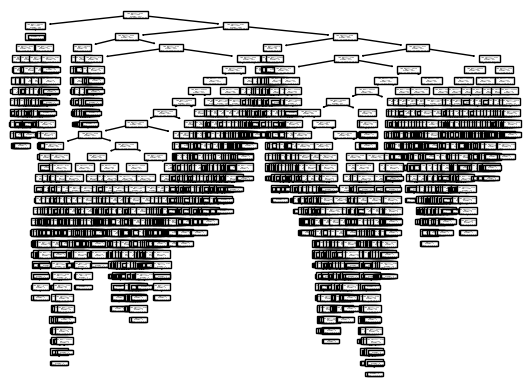

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

tree.plot_tree(dtree, feature_names=features)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lo = LogisticRegression()
lo.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lo_pred = lo.predict(X_test)

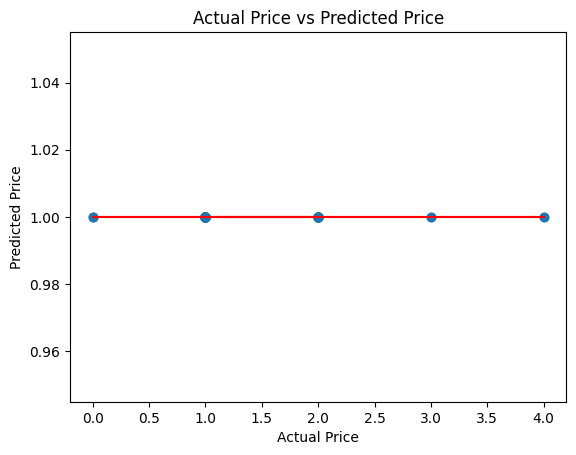

In [ ]:
plt.scatter(y_test,lo_pred)

plt.plot(y_test,lo_pred,'r')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [ ]:
df.head(1)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1           3735.138   

   Item_Fat_Content_Encoded  
0                         1

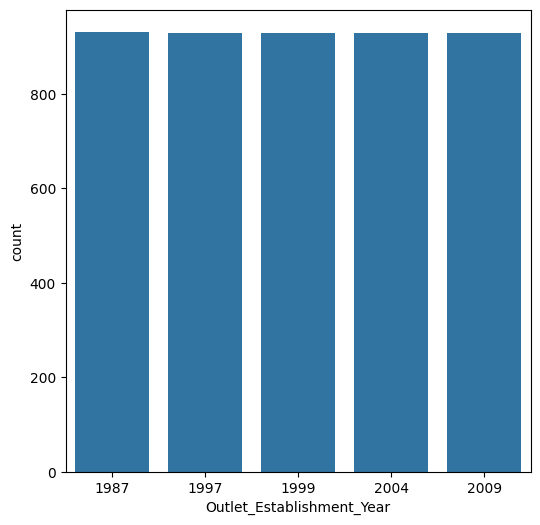

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

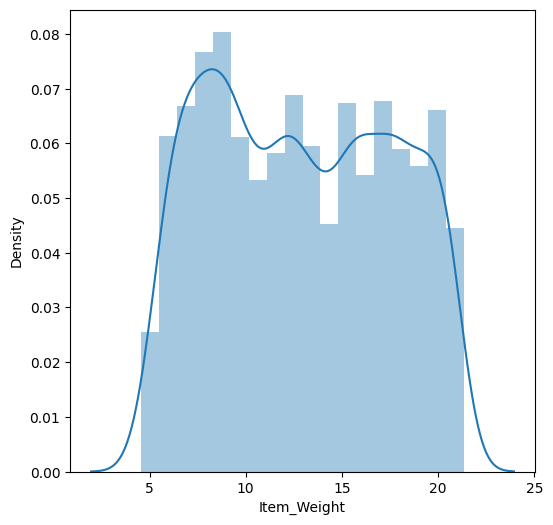

In [ ]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

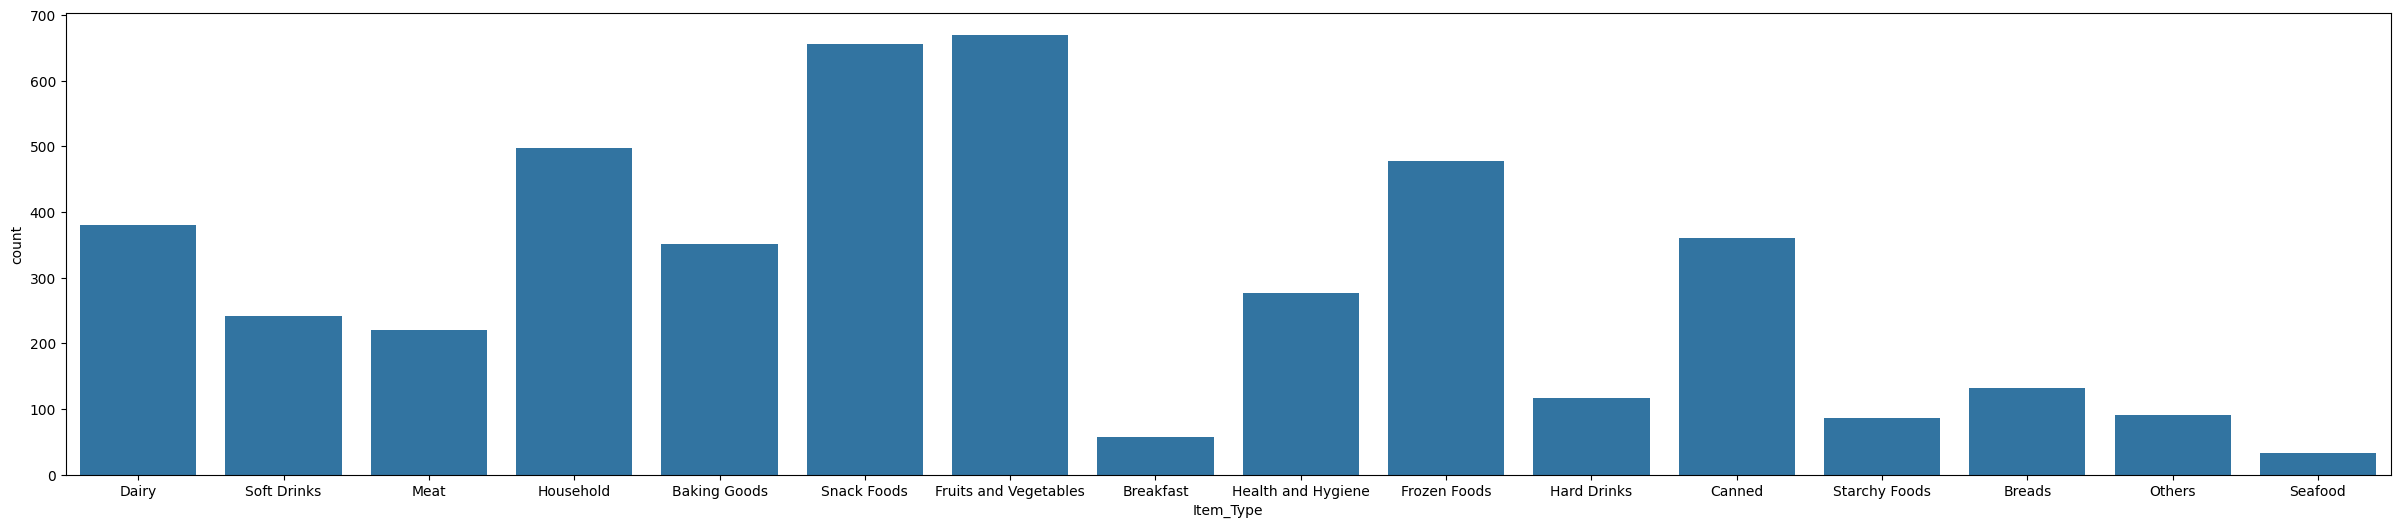

In [ ]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=df)
plt.show()

In [ ]:
encoder = LabelEncoder()

In [ ]:
df1 = pd.read_csv('Train.csv')

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1.head(1)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1           3735.138

In [ ]:
df1['Item_Identifier'] = encoder.fit_transform(df1['Item_Identifier'])

df1['Item_Fat_Content'] = encoder.fit_transform(df1['Item_Fat_Content'])

df1['Item_Type'] = encoder.fit_transform(df1['Item_Type'])

df1['Outlet_Identifier'] = encoder.fit_transform(df1['Outlet_Identifier'])

df1['Outlet_Size'] = encoder.fit_transform(df1['Outlet_Size'])

df1['Outlet_Location_Type'] = encoder.fit_transform(df1['Outlet_Location_Type'])
df1['Outlet_Type'] = encoder.fit_transform(df1['Outlet_Type'])

In [ ]:
df1.head(2)

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              154         9.30                 1         0.016047          4   
1                8         5.92                 2         0.019278         14   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                  4                       1999            1   
1   48.2692                  1                       2009            1   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0                     0            0          3735.1380  
1                     2            1           443.4228

In [ ]:
X = df1.drop(columns='Item_Outlet_Sales', axis=1)
Y = df1['Item_Outlet_Sales']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(4650, 11) (3487, 11) (1163, 11)


XGBoost Regressor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [ ]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.9052483313790803


In [ ]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [ ]:
print('R Squared value = ', r2_test)

R Squared value =  0.3362999946431767


In [ ]:
import numpy as np

# Example input data for prediction
# The input data should match the order and types of features used in your model
# Let's assume the features in your model are in the following order:
# (Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP,
#  Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type)

#input_data = (1121, 19.20, 1, 0.000000, 6, 182.0950, 0, 1998, 2, 2, 0)

input_data = (1121,8.355,3,0.013926,0,93.0462,2,2004,2,1,0)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the data as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction using the trained model
prediction = regressor.predict(input_data_reshaped)

print(f'Predicted Item Outlet Sales: {prediction[0]:.2f}')

Predicted Item Outlet Sales: 1659.68


In [ ]:
df1[df1['Item_Identifier'] == 1121]

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
4384             1121        8.355                 3         0.013926   
4641             1121        8.355                 1         0.013929   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
4384          0   93.0462                  2                       2004   
4641          0   94.1462                  3                       1997   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
4384            2                     1            0          1110.5544  
4641            2                     0            0          2221.1088

In [ ]:
# Extract the values at index 3 and convert them to a list
index_list =df1.iloc[2].tolist()

# Print the list
print(index_list)

[656.0, 17.5, 1.0, 0.016760075, 10.0, 141.618, 4.0, 1999.0, 1.0, 0.0, 0.0, 2097.27]


In [ ]:
import numpy as np

# Example input data for prediction
# The input data should match the order and types of features used in your model
# Let's assume the features in your model are in the following order:
# (Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP,
#  Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type)

input_data = (683,15.100,1,0.095158,0,159.2604,3,1997,2,0,0)
#662.0, 17.5, 0.0, 0.016760075, 10.0, 141.618, 9.0, 1999.0, 1.0, 0.0, 1.0
# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the data as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction using the trained model
prediction = regressor.predict(input_data_reshaped)

print(f'Predicted Item Outlet Sales: {prediction[0]:.2f}')

Predicted Item Outlet Sales: 2854.74


In [ ]:
df1.sample(4)

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
4393              205        19.20                 4         0.005584   
6445              270         8.68                 1         0.008836   
6729              463        19.70                 4         0.080737   
6116             1428        15.35                 1         0.035143   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
4393         15  226.9062                  0                       1987   
6445          5   96.5384                  3                       1997   
6729          0  197.0110                  3                       1997   
6116          9  124.3730                  2                       2004   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
4393            0                     2            0          4514.1240  
6445            2                     0            0          1182.4608  
6729            2                     0            0          3338.9870  
6116            2                     1            0          2093.9410

In [ ]:
input_data = (1428,15.35,1,0.035143,9,124.3730,2,2004,2,1,0)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the data as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction using the trained model
prediction = regressor.predict(input_data_reshaped)

print(f'Predicted Item Outlet Sales: {prediction[0]:.2f}')

Predicted Item Outlet Sales: 2060.81
